In [356]:
import subprocess
import os,sys
import matplotlib.pyplot as plt

In [357]:
def find_train_acc(filename):
    acc = []  
    grep = subprocess.Popen(
    ["grep", "acc:" ,filename],
    stdout=subprocess.PIPE,
    )

    awk = subprocess.Popen(
    ["awk" ,"-F" ,"acc: ", "{print $2}"],
    stdin=grep.stdout,
    stdout=subprocess.PIPE,
    )

    awk2 = subprocess.Popen(
    ["awk" ,"-F" ,";", "{print $1}"],
    stdin=awk.stdout,
    stdout=subprocess.PIPE,
    )

    for line in awk2.stdout:
      acc.append(float(line.decode('utf-8').replace('\n','')))
    return acc


In [358]:
def plot(num, title):
    Task1_seq = find_train_acc("Task"+num+"_Seq/logs")
    Task1_trans = find_train_acc("Task"+num+"_Trans/logs_newcode")
    Task1_our = find_train_acc("Task"+num+"_Our/logs_newcode")
    Task1_dfs = find_train_acc("Task"+num+"_DFS/logs_newcode")
    Task1_seq_brac = find_train_acc("Task"+num+"_Seq_Tree/logs_newcode")
    Task1_trans_brac = find_train_acc("Task"+num+"_Trans_Tree/logs_newcode")
    lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac)]
    minAcross_S_T_O_D = np.min(lis)
    print(lis)

    x = list(range(1, minAcross_S_T_O_D+1))
    plt.plot([50*i for i in x], Task1_seq[:minAcross_S_T_O_D],  label="SEQ: Seq")
    plt.plot([50*i for i in x], Task1_trans[:minAcross_S_T_O_D], label="SEQ: Transformer")
    plt.plot([50*i for i in x], Task1_our[:minAcross_S_T_O_D], label="SEQ: Transformer+Gorn")
    plt.plot([50*i for i in x], Task1_seq_brac[:minAcross_S_T_O_D], '--',label="TREE: Seq")
    plt.plot([50*i for i in x], Task1_trans_brac[:minAcross_S_T_O_D], '--',label="TREE: Trans")
    plt.plot([50*i for i in x], Task1_dfs[:minAcross_S_T_O_D], '--',label="TREE: Transformer+Gorn+DFS")
    plt.xlabel('Steps sampled every 50 steps')
    plt.ylabel('Training Accuracy')
    plt.title(title)
    plt.tight_layout()
    plt.legend()
    

[1305, 702, 1241, 1166, 861, 1054]


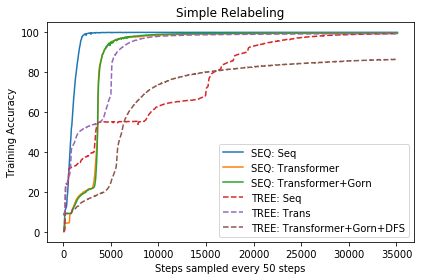

In [362]:
plot(str(1), 'Simple Relabeling')

[2000, 924, 1014, 1214, 872, 1013]


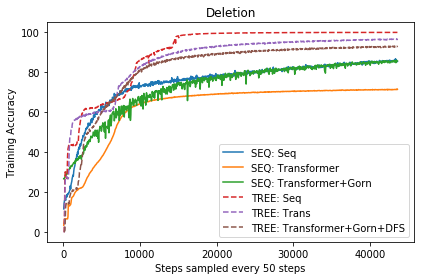

In [360]:
plot(str(4), 'Deletion')

[1544, 0, 0, 0, 0, 186]


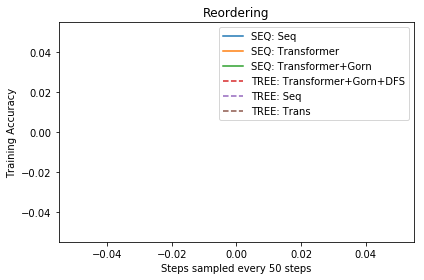

In [342]:
plot(str(3), 'Reordering')

In [ ]:
plot(str(2), 'Complex Relabeling')

# Simple Relabeling

[1305, 234, 1241, 1166, 355, 1054]


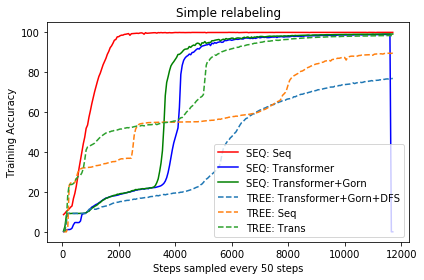

In [336]:
Task1_seq = find_acc("Task1_Seq/logs")
Task1_trans = find_acc("Task1_Trans/logs_merged")
Task1_our = find_acc("Task1_Our/logs_newcode")
Task1_dfs = find_acc("Task1_DFS/logs_newcode")
Task1_seq_brac = find_acc("Task1_Seq_Tree/logs_newcode")
# Task1_trans_brac = find_acc("Task1_Trans_Tree/logs_newcode")
                       
lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac)]
minAcross_S_T_O_D = np.min(lis)
print(lis)

x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task1_seq[:minAcross_S_T_O_D],  'r-',label="SEQ: Seq")
plt.plot([50*i for i in x], Task1_trans[:minAcross_S_T_O_D], 'b-',label="SEQ: Transformer")
plt.plot([50*i for i in x], Task1_our[:minAcross_S_T_O_D], 'g-',label="SEQ: Transformer+Gorn")
plt.plot([50*i for i in x], Task1_dfs[:minAcross_S_T_O_D], '--',label="TREE: Transformer+Gorn+DFS")
plt.plot([50*i for i in x], Task1_seq_brac[:minAcross_S_T_O_D], '--',label="TREE: Seq")
plt.plot([50*i for i in x], Task1_trans_brac[:minAcross_S_T_O_D], '--',label="TREE: Trans")
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Training Accuracy')
plt.title('Simple relabeling')
plt.tight_layout()
plt.legend()

# Deletion

[2000, 924, 1014, 1214]


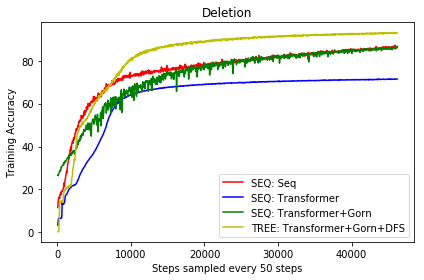

In [337]:
Task4_seq = find_acc("Task4_Seq/logs")
Task4_trans = find_acc("Task4_Trans/logs_merged")
Task4_our = find_acc("Task4_Our/logs_newcode")
Task4_dfs = find_acc("Task4_DFS/logs_newcode")

minAcross_S_T_O_D = np.min([len(Task4_seq), len(Task4_trans), len(Task4_our), len(Task4_dfs)])
print([len(Task4_seq), len(Task4_trans), len(Task4_our), len(Task4_dfs)])

x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task4_seq[:minAcross_S_T_O_D],  'r-',label="SEQ: Seq")
plt.plot([50*i for i in x], Task4_trans[:minAcross_S_T_O_D], 'b-',label="SEQ: Transformer")
plt.plot([50*i for i in x], Task4_our[:minAcross_S_T_O_D], 'g-',label="SEQ: Transformer+Gorn")
plt.plot([50*i for i in x], Task4_dfs[:minAcross_S_T_O_D], 'y-',label="TREE: Transformer+Gorn+DFS")
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Training Accuracy')
plt.title('Deletion')
plt.tight_layout()
plt.legend()

# Complex Relabeling

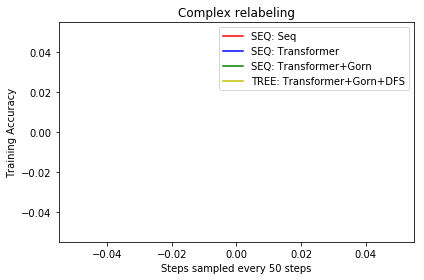

In [212]:
Task2_seq = find_acc("Task2_Seq/logs")
Task2_trans = find_acc("Task2_Trans/logs_merged")
Task2_our = find_acc("Task2_Our/logs_newcode")
Task2_dfs = find_acc("Task2_DFS/logs_newcode")

minAcross_S_T_O_D = np.min([len(Task2_seq), len(Task2_trans), len(Task2_our), len(Task2_dfs)])

x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task2_seq[:minAcross_S_T_O_D],  'r-',label="SEQ: Seq")
plt.plot([50*i for i in x], Task2_trans[:minAcross_S_T_O_D], 'b-',label="SEQ: Transformer")
plt.plot([50*i for i in x], Task2_our[:minAcross_S_T_O_D], 'g-',label="SEQ: Transformer+Gorn")
plt.plot([50*i for i in x], Task2_dfs[:minAcross_S_T_O_D], 'y-',label="TREE: Transformer+Gorn+DFS")
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Training Accuracy')
plt.title('Complex relabeling')
plt.tight_layout()
plt.legend()

# Reordering

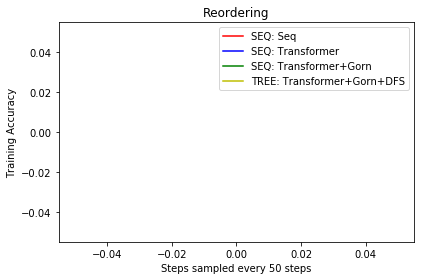

In [213]:
Task3_seq = find_acc("Task3_Seq/logs")
Task3_trans = find_acc("Task3_Trans/logs_merged")
Task3_our = find_acc("Task3_Our/logs_newcode")
Task3_dfs = find_acc("Task3_DFS/logs_newcode")

minAcross_S_T_O_D = np.min([len(Task3_seq), len(Task3_trans), len(Task3_our), len(Task3_dfs)])

x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task3_seq[:minAcross_S_T_O_D],  'r-',label="SEQ: Seq")
plt.plot([50*i for i in x], Task3_trans[:minAcross_S_T_O_D], 'b-',label="SEQ: Transformer")
plt.plot([50*i for i in x], Task3_our[:minAcross_S_T_O_D], 'g-',label="SEQ: Transformer+Gorn")
plt.plot([50*i for i in x], Task3_dfs[:minAcross_S_T_O_D], 'y-',label="TREE: Transformer+Gorn+DFS")
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Training Accuracy')
plt.title('Reordering')
plt.tight_layout()
plt.legend()

In [186]:
Task1_seq = find_acc("Task1_Seq/logs")
Task2_seq = find_acc("Task2_Seq/logs")
Task3_seq = find_acc("Task3_Seq/logs")
Task4_seq = find_acc("Task4_Seq/logs")
Task1_trans = find_acc("Task1_Trans/logs")
Task2_trans = find_acc("Task2_Trans/logs")
Task3_trans = find_acc("Task3_Trans/logs")
Task4_trans = find_acc("Task4_Trans/logs")
Task1_our = find_acc("Task1_Our/logs")
Task2_our = find_acc("Task2_Our/logs")
Task3_our = find_acc("Task3_Our/logs")
Task4_our = find_acc("Task4_Our/logs")
Task1_dfs = find_acc("Task1_DFS/logs")
Task2_dfs = find_acc("Task2_DFS/logs")
Task3_dfs = find_acc("Task3_DFS/logs")
Task4_dfs = find_acc("Task4_DFS/logs")

In [187]:
import numpy as np
minLenSeq = np.min([len(Task1_seq),len(Task2_seq),len(Task3_seq),len(Task4_seq)])
minLenTrans = np.min([len(Task1_trans),len(Task2_trans),len(Task3_trans),len(Task4_trans)])
minLenOur = np.min([len(Task1_our), len(Task2_our), len(Task3_our), len(Task4_our)])
# minLenDFS = np.min([len(Task1_dfs), len(Task2_dfs), len(Task3_dfs), len(Task4_dfs)])
minLenDFS = np.min([len(Task4_dfs)])
minAcross_S_T = np.min([minLenSeq, minLenTrans])
minAcross_S_T_O = np.min([minLenSeq, minLenTrans,minLenOur])
minAcross_S_T_O_D = np.min([minLenSeq, minLenTrans,minLenOur,minLenDFS])

In [188]:
print("Number of iterations")
print("Seq",[len(Task1_seq),len(Task2_seq),len(Task3_seq),len(Task4_seq)], minLenSeq)
print("Trans",[len(Task1_trans),len(Task2_trans),len(Task3_trans),len(Task4_trans)], minLenTrans)
print("Our",[len(Task1_our), len(Task2_our), len(Task3_our), len(Task4_our)], minLenOur)
print("DFS",[len(Task1_dfs), len(Task2_dfs), len(Task3_dfs), len(Task4_dfs)], minLenDFS)
print("Across_ST",minAcross_S_T)
print("Across_STO",minAcross_S_T_O)

Number of iterations
Seq [1305, 972, 1544, 2000] 972
Trans [1566, 1599, 1697, 2000] 1566
Our [2000, 2000, 2000, 2000] 2000
DFS [2000, 0, 2000, 2000] 2000
Across_ST 972
Across_STO 972


# SEQ PLOT

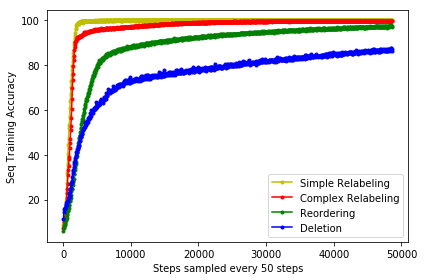

In [189]:
x = list(range(1, minLenSeq+1))
plt.plot([50*i for i in x], Task1_seq[:minLenSeq], label="Simple Relabeling", marker=".", color='y')
plt.plot([50*i for i in x], Task2_seq[:minLenSeq], label="Complex Relabeling", marker=".", color='r')
plt.plot([50*i for i in x], Task3_seq[:minLenSeq], label="Reordering", marker=".", color='g')
plt.plot([50*i for i in x], Task4_seq[:minLenSeq], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Seq Training Accuracy')
plt.tight_layout()
plt.legend()


# TRANSFORMER PLOT


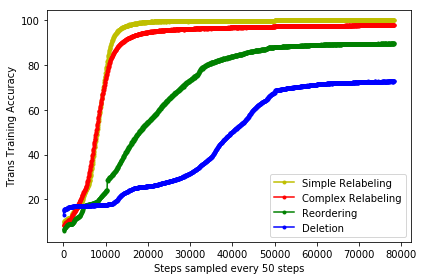

In [190]:
x = list(range(1, minLenTrans+1))
plt.plot([50*i for i in x], Task1_trans[:minLenTrans], label="Simple Relabeling", marker=".", color='y')
plt.plot([50*i for i in x], Task2_trans[:minLenTrans], label="Complex Relabeling", marker=".", color='r')
plt.plot([50*i for i in x], Task3_trans[:minLenTrans], label="Reordering", marker=".", color='g')
plt.plot([50*i for i in x], Task4_trans[:minLenTrans], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Trans Training Accuracy')
plt.tight_layout()
plt.legend()

# OUR MODEL

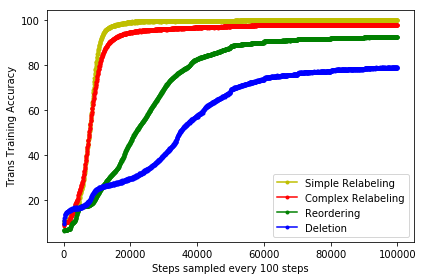

In [191]:
x = list(range(1, minLenOur+1))
plt.plot([50*i for i in x], Task1_our[:minLenOur], label="Simple Relabeling", marker=".", color='y')
plt.plot([50*i for i in x], Task2_our[:minLenOur], label="Complex Relabeling", marker=".", color='r')
plt.plot([50*i for i in x], Task3_our[:minLenOur], label="Reordering", marker=".", color='g')
plt.plot([50*i for i in x], Task4_our[:minLenOur], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Trans Training Accuracy')
plt.tight_layout()
plt.legend()

# DFS Model

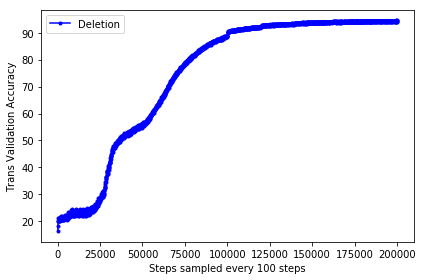

In [192]:
x = list(range(1, minLenDFS+1))
# plt.plot([100*i for i in x], Task1_our[:minLenOur], label="Simple Relabeling", marker=".", color='y')
# plt.plot([100*i for i in x], Task2_our[:minLenOur], label="Complex Relabeling", marker=".", color='r')
# plt.plot([100*i for i in x], Task3_our[:minLenOur], label="Reordering", marker=".", color='g')
plt.plot([100*i for i in x], Task4_dfs[:minLenDFS], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Trans Validation Accuracy')
plt.tight_layout()
plt.legend()

# SEQ AND TRANSFORMER PLOT

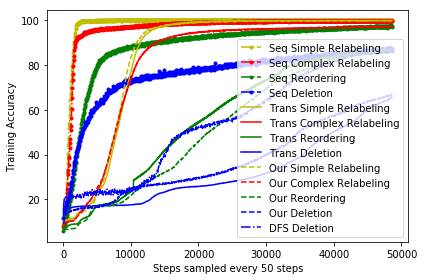

In [193]:
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task1_seq[:minAcross_S_T_O_D],  'y-..',label="Seq Simple Relabeling")
plt.plot([50*i for i in x], Task2_seq[:minAcross_S_T_O_D], 'r-..',label="Seq Complex Relabeling")
plt.plot([50*i for i in x], Task3_seq[:minAcross_S_T_O_D], 'g-..',label="Seq Reordering")
plt.plot([50*i for i in x], Task4_seq[:minAcross_S_T_O_D], 'b-..',label="Seq Deletion")
plt.plot([50*i for i in x], Task1_trans[:minAcross_S_T_O_D], 'y-',label="Trans Simple Relabeling")
plt.plot([50*i for i in x], Task2_trans[:minAcross_S_T_O_D], 'r-',label="Trans Complex Relabeling")
plt.plot([50*i for i in x], Task3_trans[:minAcross_S_T_O_D], 'g-',label="Trans Reordering")
plt.plot([50*i for i in x], Task4_trans[:minAcross_S_T_O_D], 'b-',label="Trans Deletion")
plt.plot([50*i for i in x], Task1_our[:minAcross_S_T_O_D], 'y--',label="Our Simple Relabeling")
plt.plot([50*i for i in x], Task2_our[:minAcross_S_T_O_D], 'r--',label="Our Complex Relabeling")
plt.plot([50*i for i in x], Task3_our[:minAcross_S_T_O_D], 'g--',label="Our Reordering")
plt.plot([50*i for i in x], Task4_our[:minAcross_S_T_O_D], 'b--',label="Our Deletion")
plt.plot([50*i for i in x], Task4_dfs[:minAcross_S_T_O_D], 'b-.',label="DFS Deletion")

plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Training Accuracy')
plt.tight_layout()
plt.legend()

# SEQ AND TRANSFORMER AND OUR MODEL PLOT

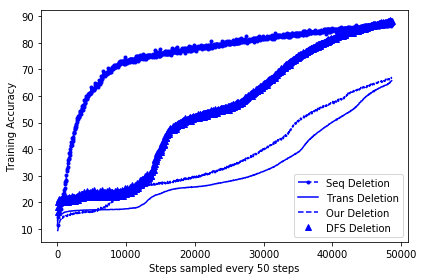

In [194]:
x = list(range(1, minAcross_S_T_O_D+1))
# plt.plot([50*i for i in x], Task1_seq[:minAcross_S_T_O_D],  'y-..',label="Seq Simple Relabeling")
# plt.plot([50*i for i in x], Task2_seq[:minAcross_S_T_O_D], 'r-..',label="Seq Complex Relabeling")
# plt.plot([50*i for i in x], Task3_seq[:minAcross_S_T_O_D], 'g-..',label="Seq Reordering")
plt.plot([50*i for i in x], Task4_seq[:minAcross_S_T_O_D], 'b-..',label="Seq Deletion")
# plt.plot([50*i for i in x], Task1_trans[:minAcross_S_T_O_D], 'y-',label="Trans Simple Relabeling")
# plt.plot([50*i for i in x], Task2_trans[:minAcross_S_T_O_D], 'r-',label="Trans Complex Relabeling")
# plt.plot([50*i for i in x], Task3_trans[:minAcross_S_T_O_D], 'g-',label="Trans Reordering")
plt.plot([50*i for i in x], Task4_trans[:minAcross_S_T_O_D], 'b-',label="Trans Deletion")
# plt.plot([50*i for i in x], Task1_our[:minAcross_S_T_O_D], 'y--',label="Our Simple Relabeling")
# plt.plot([50*i for i in x], Task2_our[:minAcross_S_T_O_D], 'r--',label="Our Complex Relabeling")
# plt.plot([50*i for i in x], Task3_our[:minAcross_S_T_O_D], 'g--',label="Our Reordering")
plt.plot([50*i for i in x], Task4_our[:minAcross_S_T_O_D], 'b--',label="Our Deletion")
plt.plot([50*i for i in x], Task4_dfs[:minAcross_S_T_O_D], 'b^',label="DFS Deletion")

plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Training Accuracy')
plt.tight_layout()
plt.legend()

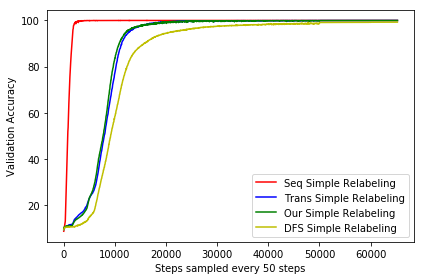

In [195]:
minAcross_S_T_O_D = np.min([len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task1_seq[:minAcross_S_T_O_D],  'r-',label="Seq Simple Relabeling")
plt.plot([50*i for i in x], Task1_trans[:minAcross_S_T_O_D], 'b-',label="Trans Simple Relabeling")
plt.plot([50*i for i in x], Task1_our[:minAcross_S_T_O_D], 'g-',label="Our Simple Relabeling")
plt.plot([50*i for i in x], Task1_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Simple Relabeling")
plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()

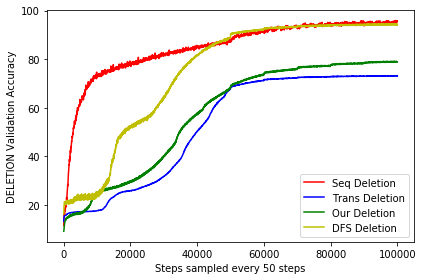

In [196]:
minAcross_S_T_O_D = np.min([len(Task4_seq), len(Task4_trans), len(Task4_our), len(Task4_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task4_seq[:minAcross_S_T_O_D], 'r-',label="Seq Deletion")
plt.plot([50*i for i in x], Task4_trans[:minAcross_S_T_O_D], 'b-',label="Trans Deletion")
plt.plot([50*i for i in x], Task4_our[:minAcross_S_T_O_D], 'g-',label="Our Deletion")
plt.plot([50*i for i in x], Task4_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Deletion")

plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('DELETION Validation Accuracy')
plt.tight_layout()
plt.legend()

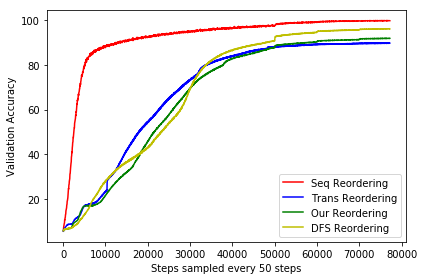

In [197]:
minAcross_S_T_O_D = np.min([len(Task3_seq), len(Task3_trans), len(Task3_our), len(Task3_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([50*i for i in x], Task3_seq[:minAcross_S_T_O_D], 'r-',label="Seq Reordering")
plt.plot([50*i for i in x], Task3_trans[:minAcross_S_T_O_D], 'b-',label="Trans Reordering")
plt.plot([50*i for i in x], Task3_our[:minAcross_S_T_O_D], 'g-',label="Our Reordering")
plt.plot([50*i for i in x], Task3_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Reordering")


plt.xlabel('Steps sampled every 50 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()